## Estudo da correlação entre variáveis e regressão

Na atividade desta semana, vamos utilizar o conjunto de dados "bodyfat.csv".

1)  Faça todo o estudo descritivo das variáveis.

2) Dentre as variáveis apresentadas no arquivo, existe alguma no quais os dados não estejam bem distribuídos (utilizem os seus conhecimentos de estatística descritiva)?

3)  O conjunto de dados é uma importante ferramenta para estudo sobre obesidade. É possível que haja correlação entre as variáveis e o nível de gordura corporal (variável BodyFat). Faça o gráfico de dispersão de cada uma das variáveis com a variável BodyFat e calcule a correlação.

4)  Dos resultados encontrados, qual você indicaria para compor um modelo numérico para prever a gordura corporal? Explique os motivos da escolha baseados nas informações calculadas anteriormente.

5)  A partir das informações anteriores, encontre uma reta de regressão com as variáveis encontradas no item anterior (regressão múltipla).

6)  Uma vez escolhida as melhores variáveis para representar a variável "Body Fat", o que se pode inferir sobre o conjunto de dados apresentados e o modelo encontrado no item 5?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.linear_model


pf = pd.read_csv("bodyfat.csv")
pf

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


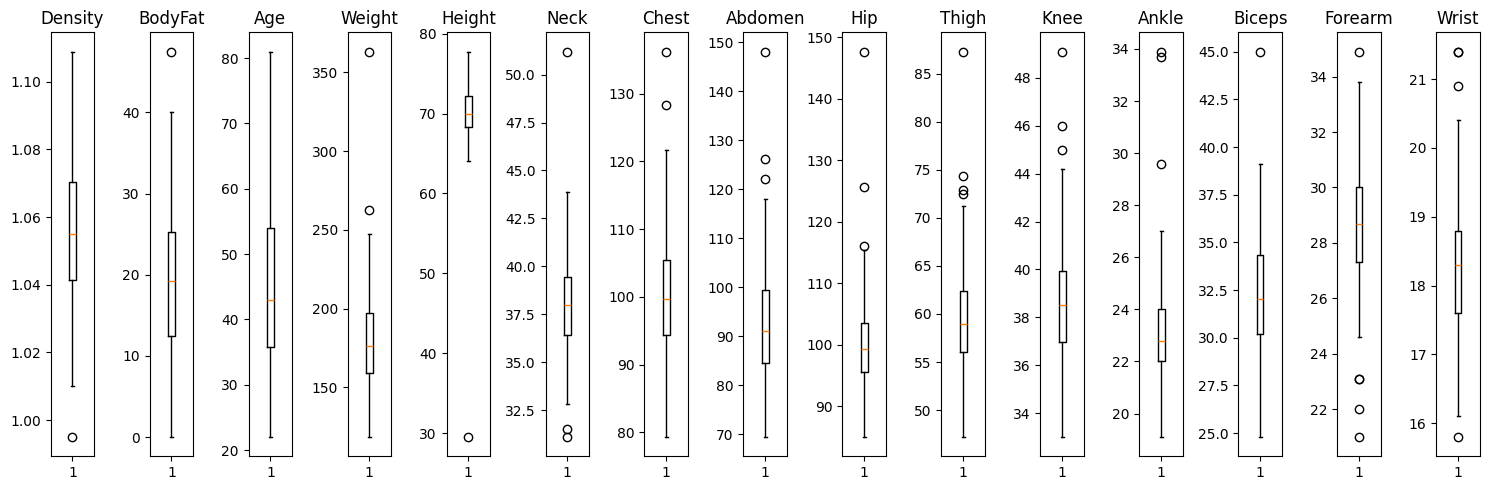

In [2]:
# 1.
nomes_colunas = ['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
dados = []
for i in range(len(nomes_colunas)):
    dados.append(pf[f"{nomes_colunas[i]}"])

fig, axs = plt.subplots(1, len(dados), figsize=(15, 5))
for i in range(len(dados)):
    axs[i].boxplot(dados[i])
    axs[i].set_title(f"{nomes_colunas[i]}")
plt.tight_layout()
plt.show()


2. Sim, a partir do boxplot, dá para perceber que alguns dos valores possuem muito espaço em branco e outliers muito distantes do boxplot. Por exemplo, os boxplots "weights", "height", "neck", "Hip", "abdomen" e "ankle".

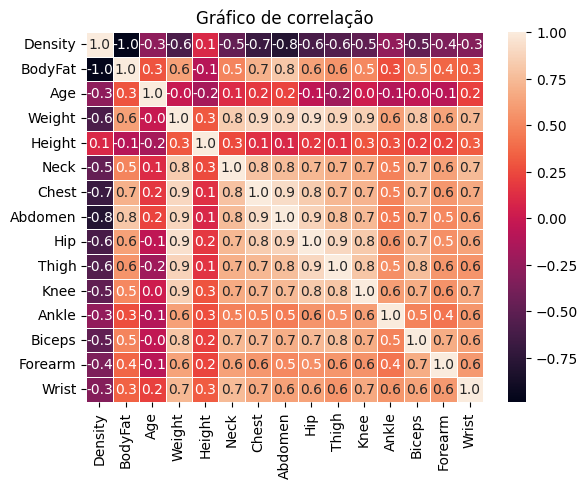

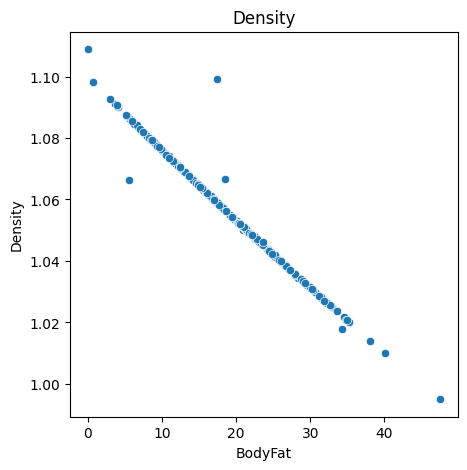

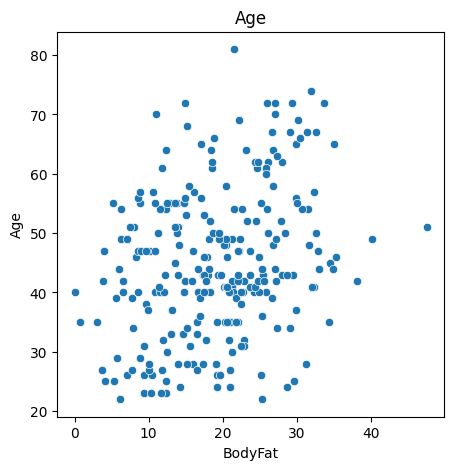

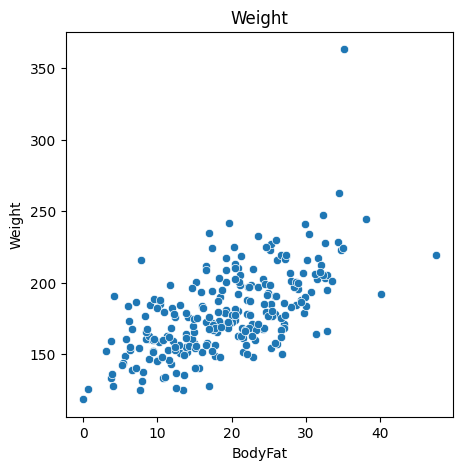

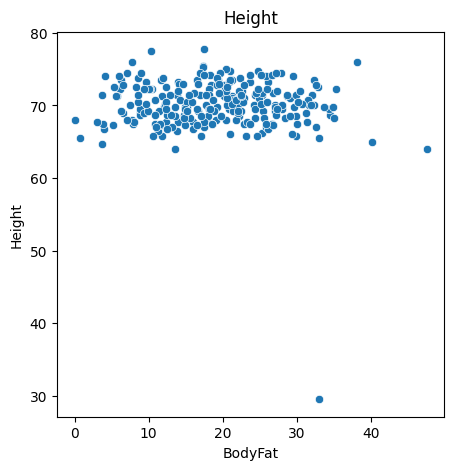

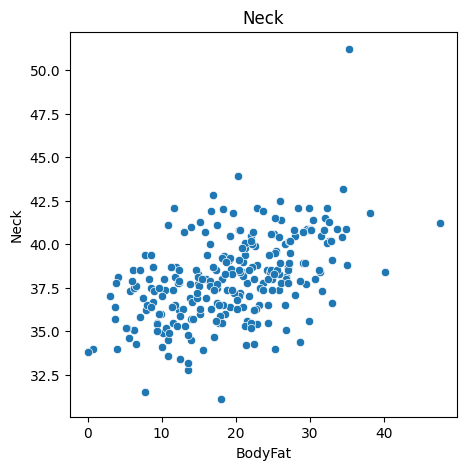

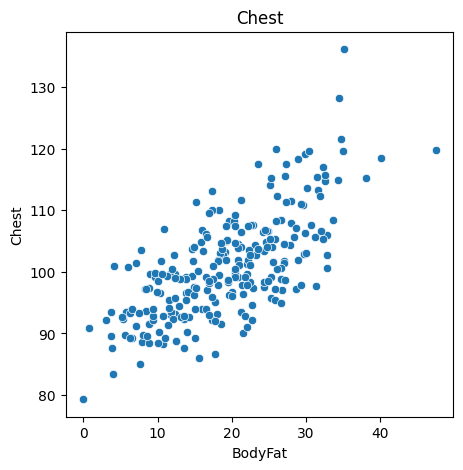

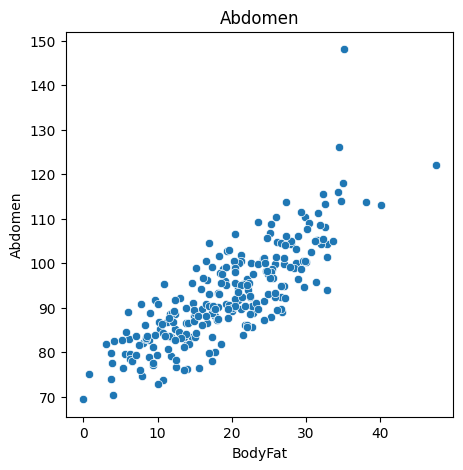

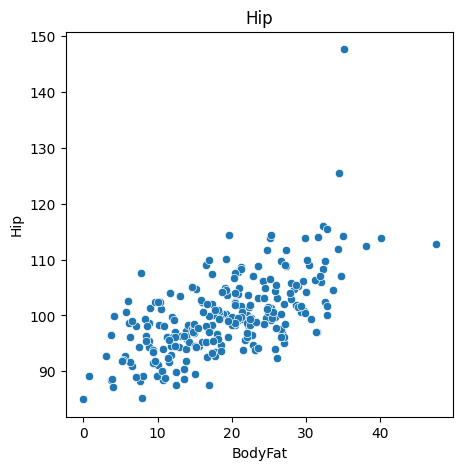

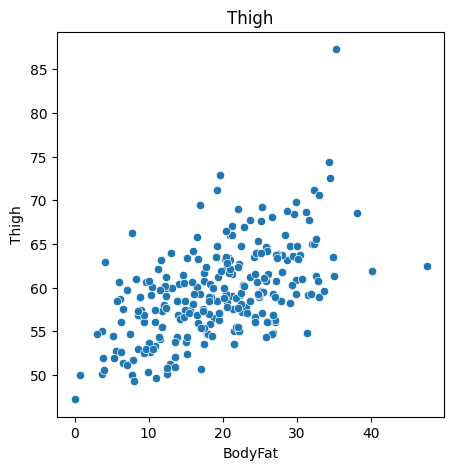

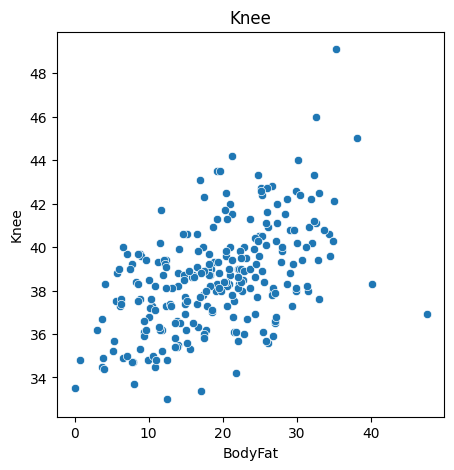

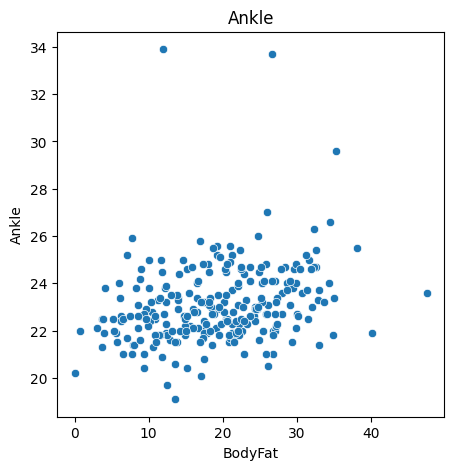

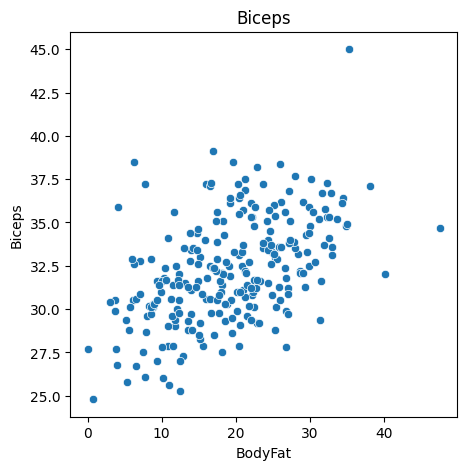

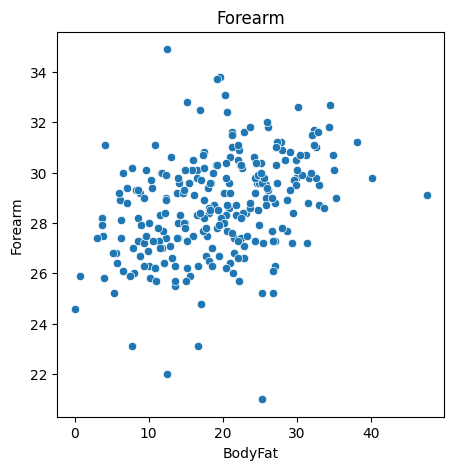

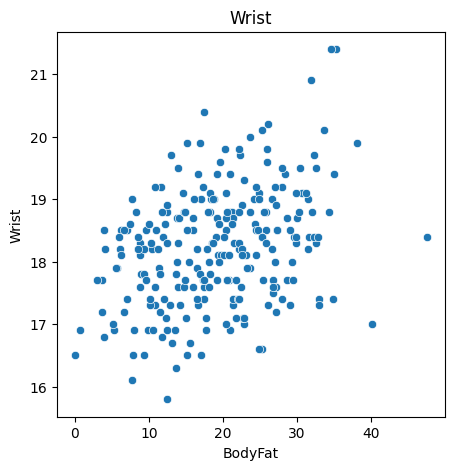

In [3]:
#3.
correlacao = pf.corr()
plot = sns.heatmap(correlacao, annot=True, fmt=".1f", linewidths=.6)
plt.title("Gráfico de correlação")
plt.show()

"""
p = 0,9 a 1 (positivo ou negativo): correlação muito forte;
p = 0,7 a 09 (positivo ou negativo): correlação forte;
p = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
p = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
p = 0 a 0,3 (positivo ou negativo): não possui correlação.
"""

for i in range(len(dados)):
    if i != 1:
        plt.figure(figsize=(5,5))
        sns.scatterplot(x=dados[1],y=dados[i])
        plt.title(f"{nomes_colunas[i]}")
        plt.show()



4. Correlação, pois mostra a força da relação entre a variável Body Fat e as outras, o que permite um melhor entendimento da relação entre elas, logo, uma melhor estimativa.

In [6]:
# 5.

X = pf.drop('BodyFat', axis=1)
y = pf['BodyFat']
modelo = sklearn.linear_model.LinearRegression()
modelo.fit(X, y)
print(f"Reta Body Fat = {format(modelo.intercept_):.5} + {' + '.join([f'{coef:.5}*{col}' for coef, col in zip(modelo.coef_, X.columns)])}")

Reta Body Fat = 450.0 + -411.24*Density + 0.012587*Age + 0.010054*Weight + -0.0079807*Height + -0.028456*Neck + 0.02678*Chest + 0.018565*Abdomen + 0.019166*Hip + -0.016758*Thigh + -0.004639*Knee + -0.085676*Ankle + -0.055051*Biceps + 0.033863*Forearm + 0.0073449*Wrist


6. O conjunto de dados apresentados mostram as relações de cada variável com a variável Body Fat, porém, ainda necessita de diversos cálculos para obter um resultado preciso. O modelo do item 5 faz justamente isso e transforma todos os dados e variáveis em uma reta, o que permite uma boa estimação da variável Body Fat.